# Deep Learning for Natural Language and Code: Exercise 1

In [15]:
import os
import sklearn
from sklearn.datasets import load_svmlight_file

# Task 1: LIBSVM - BOW

## Load data

1. Download the dataset from [here](https://ai.stanford.edu/%7Eamaas/data/sentiment)
1. Copy the dataset next to this Jupyter (.ipynb file)
1. Install:
    * Sklearn (This library is only allowed to use for reading the BOW in LIBSVM format)

In [16]:
def read_bow_libsvm(path_data):
    """ Function for reading the data in the LIBSVM format (.feat files). 
    
    Parameters
    ----------
    dirname: str
        path of this file 
    path_data: str
        path of the folder that contains the data that is going to be used. (should be test or train)
        
    Returns
    ---------
    X,y: array_like
        Data arrays, X is an array of shape [#documents of the dataset, #words in the vocabulary], y is an array of shape [#documents,] 
    """
    
    X, y = load_svmlight_file(os.path.join(".","aclImdb", path_data, "labeledBow.feat")) 
    
    # why?
    X = X.todense()
    
    return X, y

In [17]:
def read_vocab():
    """ Function for reading the vocabulary (.vocab file). 
    
    Parameters
    ----------
    None
        
    Returns
    ---------
    vocab: list
        list with the values of y ...... 
    """
    
    path_vocab = os.path.join(".", "aclImdb", "imdb.vocab")
    
    with open(path_vocab) as f:
        lines = f.read()

    lines = lines.split('\n')
    
    vocab = []
    for line in lines:
        vocab.append(line)
    
    return vocab

In [18]:
# Read the vocabulary
vocabulary = read_vocab()
# Read the the bag of words and the Y for the training data
X, y = read_bow_libsvm('train')
# Read the the bag of words and the Y for the test data
X_test, y_test = read_bow_libsvm('test')

MemoryError: Unable to allocate 16.7 GiB for an array with shape (25000, 89527) and data type float64

## Understanding the LIBSVM-BOW
1. What are the values in y? 
1. Why do we use  todense() in the read_bow_libsvm function?
1. How could you know which word in the vocabulary corresponds to each index in the BOW?

(25000, 89527)


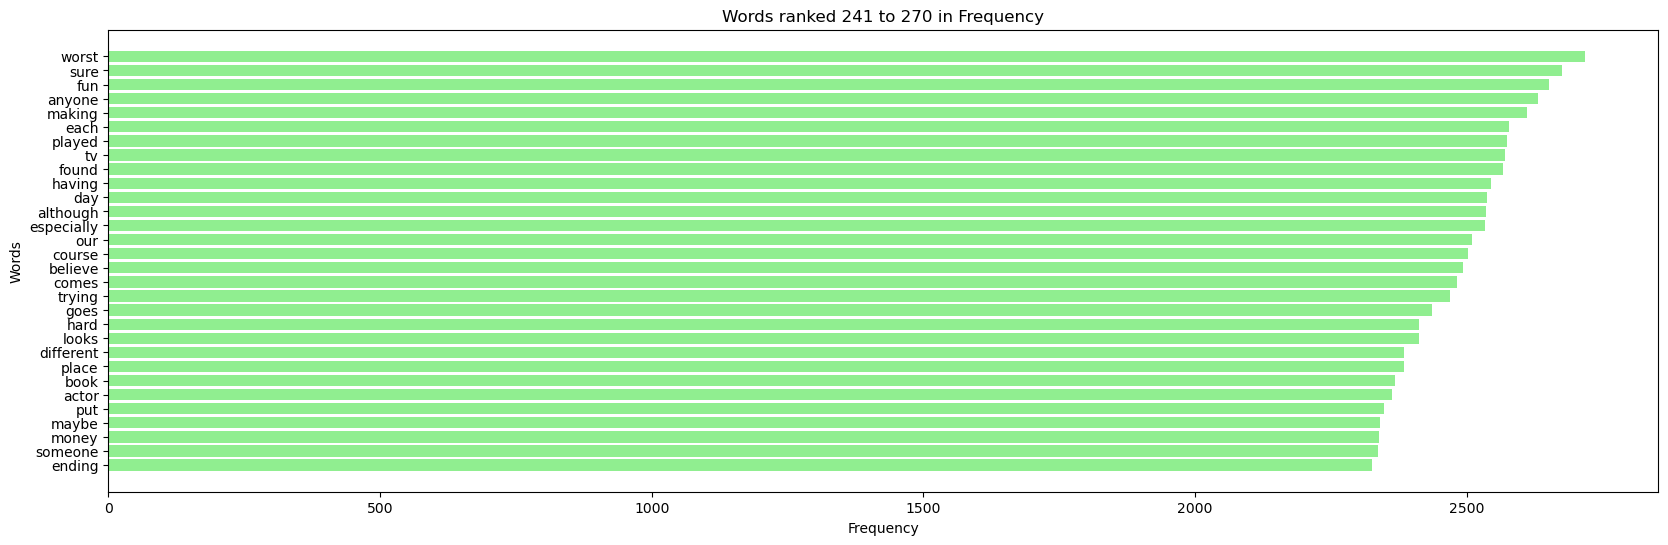

In [ ]:
# play with the previous loaded variables and understand the values of each one.
import seaborn
import matplotlib.pyplot  as plt
import numpy as np


def decode_bow(vec, vocab):
    words=[]
    for i, count in enumerate(vec):
        if count>0 :
            words.extend ([vocab[i]]* int(count))
    return " ".join(words)

#print(vocabulary[:40])
#print (X[:40])
#print (y[:40]) #rating


print(X.shape)
#decode = decode_bow(X[0].A1, vocabulary)
#print(decode)

def get_non_zero_words(doc_idx, X, vocabulary):
    """
    Extracts non-zero words for a specific document from the BoW matrix.
    
    Parameters:
    - doc_idx: Index of the document in X
    - X: The dense BoW matrix (from read_bow_libsvm)
    - vocabulary: List of words in the vocabulary
    
    Returns:
    - List of words that are present in the document and their frequencies.
    """
    
    # Get the word counts for the document at doc_idx (dense array)
    word_counts = X[doc_idx]  # This is a dense vector for the document
    
    # Get the indices of non-zero values (words present in the document)
    non_zero_idx = np.nonzero(word_counts)[0]  # Indices of non-zero values (word indices)
    
    # Get the frequencies for these words
    non_zero_values = word_counts[non_zero_idx]  # Corresponding frequencies
    
    # Get the corresponding words using indices
    words = [vocabulary[idx] for idx in non_zero_idx]
    
    # Return the list of (word, frequency) tuples
    return list(zip(words, non_zero_values))

# Nonzero words for the first document 
doc_idx = 0
non_zero_words = get_non_zero_words(doc_idx, X, vocabulary)

"""for word, freq in non_zero_words:
    print(f"Word: {word}, Frequency: {freq}")
"""
get_non_zero_words(2,X,vocabulary)
word_counts = X.sum(axis=0).A1
word_freq = dict(zip(vocabulary, word_counts))
# Sort the word frequencies in descending order
sorted_word_freq = sorted(zip(vocabulary, word_counts), key=lambda x: x[1], reverse=True)

# Frequency order to start from
tostart_n = 240  

# Number of words to plot
next_x = 30

next_words = [item[0] for item in sorted_word_freq[tostart_n:tostart_n + next_x]]
next_freqs = [item[1] for item in sorted_word_freq[tostart_n:tostart_n + next_x]]

# Plot 
plt.figure(figsize=(20, 6))
plt.barh(next_words, next_freqs, color='lightgreen')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title(f'Words ranked {tostart_n+1} to {tostart_n+next_x} in Frequency')
plt.gca().invert_yaxis()  # Most frequent on top
plt.show()

# Task 2: Bag of Words (BOW)
## Load Raw text and scores 

1. Be sure to have downloaded the dataset from the link provided in the exercise and have read the README file
1. Be sure to have copied the dataset next to this Jupyter (.ipynb file)
1. Be sure to have installed:
    * Numpy
    * NLTK (only for the stemming process)
    * Sklearn (only for building a Random Forest)
1. In this part of the exercise it is not allowed to use Sklearn
1. Build the Bag Of Words (BOW) with the raw data, for this you need to:
    * Tokenize on spaces and punctuation
    * Lower case
    * Remove punctuation
    * Remove terms appearing more often than X percent, this X percent should be variable. Which means that you should be able to change the percentage as a parameter.
    * Use NLTK porter stemmer
1. Build a classifier with the BOW previously built. Take into account:
    * The RF should be a binary classification positive (i.e., score >=7) and negative (i.e., score <= 4)
    * Test the classifier with the test data

In [ ]:
import re
import glob
import string
import numpy as np
from nltk.stem.porter import *
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
stemmer = PorterStemmer()
import os
from nltk.corpus import stopwords  



#tokenize
def preproces_data(words):
    words =words.lower()
    tok = re.split(r'[^\w]+', words)  
    
    tok = [token for token in tok if token]
    
    tok = [token for token in tok if not any(char.isdigit() for char in token) and "_" not in token]    
    stop_words = set(stopwords.words('english')) 
    tok = [token for token in tok if token not in stop_words]  
    
    #tok = [stemmer.stem(token) for token in tok]
    return tok


#read files
#should i tokenize both the training and test data?
train_dir_pos = './aclImdb/train/pos'
train_dir_neg = './aclImdb/train/neg'

def read_files(path, label):
    words = []
    labels =[]
    for filename in os.listdir(path):
        if filename.endswith('.txt'):
            with open(os.path.join(path, filename)) as f:
                words.append(f.read())
                labels.append(label)
    return words, labels

train_pos_words, train_pos_labels = read_files(train_dir_pos, 1)
train_neg_words, train_neg_labels = read_files(train_dir_neg, 0)

train_words =train_pos_words+train_neg_words
train_labels = train_pos_labels + train_neg_labels

test_dir_pos = './aclImdb/test/pos'
test_dir_neg = './aclImdb/test/neg'

def read_files(path, label):
    words = []
    labels =[]
    for filename in os.listdir(path):
        if filename.endswith('.txt'):
            with open(os.path.join(path, filename), encoding='utf-8') as f:
                words.append(f.read())
                labels.append(label)
    return words, labels

test_pos_words, test_pos_labels = read_files(test_dir_pos, 1)
test_neg_words, test_neg_labels = read_files(test_dir_neg, 0)

test_words =test_pos_words+test_neg_words
test_labels = test_pos_labels + test_neg_labels

words_tokenized_test = [preproces_data(words) for words in test_words]
words_tokenized_train  = [preproces_data(words) for words in train_words]

vocab = sorted(set([token for doc in words_tokenized_train for token in doc]))
word_indx= {word: index for index, word in enumerate(vocab)}


def removeterms(words_tok, word_idx, top_per=0.1):
    doc_count = len(words_tok)  
    word_doc_count = Counter()

    for tk in words_tok:
        uniq_tok = set(tk)  
        for word in uniq_tok:
            word_doc_count[word] += 1
    
    perc = top_per * doc_count  
    
    filtered_word = {word for word, count in word_doc_count.items() if count >= perc}

    filt_word_index = {word: word_idx[word] for word in filtered_word if word in word_idx}

    return filt_word_index, filtered_word

#filtered_words_indx, filtered_words = removeterms(words_tokenized, word_indx)


#print("Filtered words:", filtered_words)
#print("Filtered word indices:", filtered_words_indx)
#??
"""stemming is stupid and wouldn't work with all words.
two words that have the same meaning would end up being treated differently if the word is considered "irregular" 
meaning if when prefixes or postfixes are added to the word it changes letters in the original formation of the word
solution? use lemmatization??
after reading transformers paper, i think we can also use transformers to fix the issue 
 if we use transformers (BERT) we can also solve other issues (there's still the pending issue of negation. the model wouldn't perform well.
 (would it be able to capture sarcasm? this is a bit nuanced)
"""




'stemming is stupid and wouldn\'t work with all words.\ntwo words that have the same meaning would end up being treated differently if the word is considered "irregular" \nmeaning if when prefixes or postfixes are added to the word it changes letters in the original formation of the word\nsolution? use lemmatization??\nafter reading transformers paper, i think we can also use transformers to fix the issue \n if we use transformers (BERT) we can also solve other issues (there\'s still the pending issue of negation. the model wouldn\'t perform well.\n (would it be able to capture sarcasm? this is a bit nuanced)\n\n'

## Load data

Read all the training data, including the reviews and the scores associated to each one. Be sure to explore the data and learn characteristics of them, such as the type of encoding and special characters. 

In [3]:
"""import os
import re

#read files
#should i tokenize both the training and test data?
train_dir_pos = './aclImdb/test/pos'
train_dir_neg = './aclImdb/test/neg'

def read_files(path, label):
    words = []
    labels =[]
    for filename in os.listdir(path):
        if filename.endswith('.txt'):
            with open(os.path.join(path, filename)) as f:
                words.append(f.read())
                labels.append(label)
    return words, labels



train_pos_words, train_pos_labels = read_files(train_dir_pos, 1)
train_neg_words, train_neg_labels = read_files(train_dir_neg, 0)

train_words =train_pos_words+train_neg_words
train_lables = train_pos_labels + train_neg_labels

html_tag_pattern = re.compile(r'<.*?>')
html_entity_pattern = re.compile(r'&[a-zA-Z#0-9]+;')

# Process each document separately to find HTML tags
html_tags_found = []
for doc in train_pos_words:
    found_tags = html_tag_pattern.findall(doc)
    html_entities_found = html_entity_pattern.search(doc)
    if found_tags:
        html_tags_found.append(found_tags)

# Print found HTML tags for the first few documents
print("HTML Tags Found in the First 3 Documents:", html_tags_found[:30])


# Check if HTML entities are present in the text


if html_entities_found:
    print("HTML entities detected.")
    # Now you can apply html.unescape() or any other logic for handling HTML entities
else:
    print("No HTML entities found.")"""

'import os\nimport re\n\n#read files\n#should i tokenize both the training and test data?\ntrain_dir_pos = \'./aclImdb/test/pos\'\ntrain_dir_neg = \'./aclImdb/test/neg\'\n\ndef read_files(path, label):\n    words = []\n    labels =[]\n    for filename in os.listdir(path):\n        if filename.endswith(\'.txt\'):\n            with open(os.path.join(path, filename)) as f:\n                words.append(f.read())\n                labels.append(label)\n    return words, labels\n\n\n\ntrain_pos_words, train_pos_labels = read_files(train_dir_pos, 1)\ntrain_neg_words, train_neg_labels = read_files(train_dir_neg, 0)\n\ntrain_words =train_pos_words+train_neg_words\ntrain_lables = train_pos_labels + train_neg_labels\n\nhtml_tag_pattern = re.compile(r\'<.*?>\')\nhtml_entity_pattern = re.compile(r\'&[a-zA-Z#0-9]+;\')\n\n# Process each document separately to find HTML tags\nhtml_tags_found = []\nfor doc in train_pos_words:\n    found_tags = html_tag_pattern.findall(doc)\n    html_entities_found = ht

In [4]:
"""def preproces_data(words):
    words =words.lower()
     Im already tokenizing on punctuation, why do i need to remove the punctuation later on??
    I converted to lower case before tokenization. would difference would it make at what stage this happens?
    tok = re.split(r'[^w\s]', words)
    tok = [tok for tok in tok if tok]
    return tok
"""

"def preproces_data(words):\n    words =words.lower()\n     Im already tokenizing on punctuation, why do i need to remove the punctuation later on??\n    I converted to lower case before tokenization. would difference would it make at what stage this happens?\n    tok = re.split(r'[^w\\s]', words)\n    tok = [tok for tok in tok if tok]\n    return tok\n"

## Clean HTML and tokenize text
Clean the review, handle the special characters, remove the html tags and tokenize the text based on the instructions given in the exercise sheet. 

In [5]:
"""
process_matrix = []
words_tokenized  = [preproces_data(words) for words in train_words]

vocab = sorted(set(word for doc in words_tokenized for word in doc))
word_indx= {word: index for index, word in enumerate(vocab)}"""

'\nprocess_matrix = []\nwords_tokenized  = [preproces_data(words) for words in train_words]\n\nvocab = sorted(set(word for doc in words_tokenized for word in doc))\nword_indx= {word: index for index, word in enumerate(vocab)}'

## Convert to lower case and remove punctuation

In [6]:
"""I converted to lower case before tokenization and I tokenized on spaces and punctuation. 
wouldn't the code be redundant if remove the punctuation again? punctuation that doesn't exist.
or is this specificallly for cases that might be missed by the tokenization process. (which there shouldn't be any)
and why would i do that after tokenization?
"""

"I converted to lower case before tokenization and I tokenized on spaces and punctuation. \nwouldn't the code be redundant if remove the punctuation again? punctuation that doesn't exist.\nor is this specificallly for cases that might be missed by the tokenization process. (which there shouldn't be any)\nand why would i do that after tokenization?\n"

## Remove X percentage and build vocabulary 
Remove all the tokens that do not meet the requirements based on the exercise sheet and build the vocabulary. 

In [7]:
"""from collections import Counter

def removeterms(words_tok, word_idx,top_per=0.1):
    doc_count = len(words_tokenized)
    word_doc_count = Counter()

    for tk in words_tokenized:
        uniq_tok = set(tk)
        for word in uniq_tok:
            word_doc_count[word]+=1
    perc = top_per*doc_count

    filtered_word = {word for word, count in word_doc_count.items()if count >= perc}
    filt_word_index = {word: word_indx[word] for word in filtered_word} 

    return filt_word_index, filtered_word
filtered_words_indx, filte_word = removeterms(words_tokenized, word_indx)


# build vocab
vocabulary = sorted(set(word for doc in filte_word for word in doc))

# Step 2: Create a word-to-index mapping
word_to_index = {word: index for index, word in enumerate(vocabulary)}

#??"""

'from collections import Counter\n\ndef removeterms(words_tok, word_idx,top_per=0.1):\n    doc_count = len(words_tokenized)\n    word_doc_count = Counter()\n\n    for tk in words_tokenized:\n        uniq_tok = set(tk)\n        for word in uniq_tok:\n            word_doc_count[word]+=1\n    perc = top_per*doc_count\n\n    filtered_word = {word for word, count in word_doc_count.items()if count >= perc}\n    filt_word_index = {word: word_indx[word] for word in filtered_word} \n\n    return filt_word_index, filtered_word\nfiltered_words_indx, filte_word = removeterms(words_tokenized, word_indx)\n\n\n# build vocab\nvocabulary = sorted(set(word for doc in filte_word for word in doc))\n\n# Step 2: Create a word-to-index mapping\nword_to_index = {word: index for index, word in enumerate(vocabulary)}\n\n#??'

## Use Porter Stemmer for stemming

In [8]:
"""from nltk.stem.porter import *

stemmer = PorterStemmer()
stems = [stemmer.stem(word) for word in filte_word]"""

'from nltk.stem.porter import *\n\nstemmer = PorterStemmer()\nstems = [stemmer.stem(word) for word in filte_word]'

## Build the bag of words (BOW)
For building the matrix for the representation of bag of words use the previously built vocabulary and tokens for each review.

In [9]:


def create_bow(docu, word_index):
    matrix = []

    for doc_idx, tokens in enumerate(docu):  
        bow_vector = [0] * len(word_index)
        
        word_counts = Counter(tokens)  
        
        for word, count in word_counts.items():
            if word in word_index:  
                index = word_index[word]  
                bow_vector[index] = count
        
        matrix.append(bow_vector)

    train_bow = matrix

    print("BoW shape:", len(train_bow), "x", len(word_index))
    print("BoW vector (first document):", train_bow[0])

    return train_bow

train_bow = create_bow(words_tokenized_train,word_indx )
test_bow = create_bow(words_tokenized_test,word_indx )

train_pos_words, train_pos_labels = [], []
train_neg_words, train_neg_labels = [], []
train_word, train_labels = [], []
test_pos_words, test_pos_labels = [], []
test_neg_words, test_neg_labels = [], []
test_words, test_labels = [], []
words_tokenized_test, words_tokenized_train = [], []

BoW shape: 25000 x 73292
BoW vector (first document): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# Task 3: Comparing BOWs

1. Use the previous steps to build a bag of words with the training data in which the tokens that appear more than 1% are discarded. 
1. Compare your BOW with LIBSVM BOW. 

In [10]:
# check number of vocabs (if not the same check if i missed any punctuation, 
#  maybe also check if the libsvm also lowered letters and remove punc, as it should )
# do i need to convert my bow matrix into a sparse one before comapring??
# compare word count in both. for x number of words

# Task 4: Train a Random Forest and test it


In [ ]:
import numpy as np
from cuml.ensemble import RandomForestClassifier as cuRF
from cuml.preprocessing import train_test_split
import cudf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import lil_matrix, spmatrix
import scipy

#turn into a sparse matrix before training Rf

train_labels_binary = [1 if rating >= 7 else 0 for rating in train_labels if rating <= 4 or rating >= 7]

test_labels_binary = [1 if rating >= 7 else 0 for rating in test_labels if rating <= 4 or rating >= 7]
rf_gpu = cuRF(n_estimators=100, max_depth=10)

# Train the model
rf_gpu.fit(train_bow, train_labels_binary)

# Make predictions
y_pred = rf_gpu.predict(X_test)

accuracy = accuracy_score(test_labels_binary, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(test_labels_binary, y_pred))

  

MemoryError: Unable to allocate 6.83 GiB for an array with shape (25000, 73292) and data type float32

# Task 5: Markov chain
Tip: For memory optimization use sparse structures not a matrix mostrly filled with zeros

In [ ]:
""" MC have been sued for pos-tagging esp wih lnaguages with difficult grammar


"""

## Pre-process data
Read the data and using the previous built functions for the BOW representation create a list of words per each review

## Chain words
Identify all the possible pairs of words (w0, w1) in all the reviews

## Initialize the Markov's Chain

## Generate data

Here you could also try to generate words for the unlabeled part of the dataset. Try to meassure the quality of the model

**Theoretical questions:**
    - task 2 is nlp and task 4. task 5 is deff NLG
    - drawbacks and disadvantages: above in code
    -

    Polysemy single word that has multiple related meanings
    Zeugma rhetorical device where a single word, usually a verb or an adjective, Homonyms governs two or more words in a sentence, each in a different sense
    Homographs words that sound alike or are spelled the same but have different meanings
    Homophones words that are spelled the same but have different meanings
they lead to ambiguity and would lead to misunderstanding 
-- bow; words with the same spelling but different meaning are treated as the same word
-- bow don't capture context 